# Data Exploration

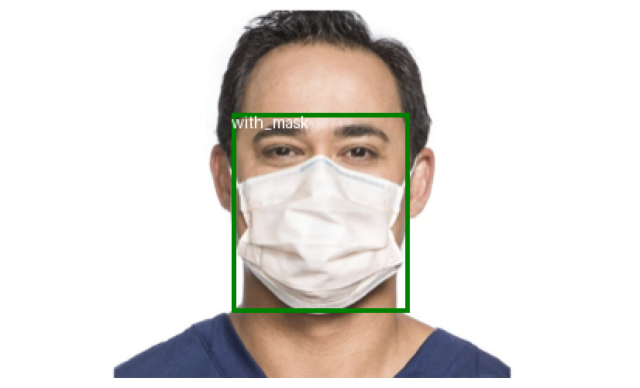

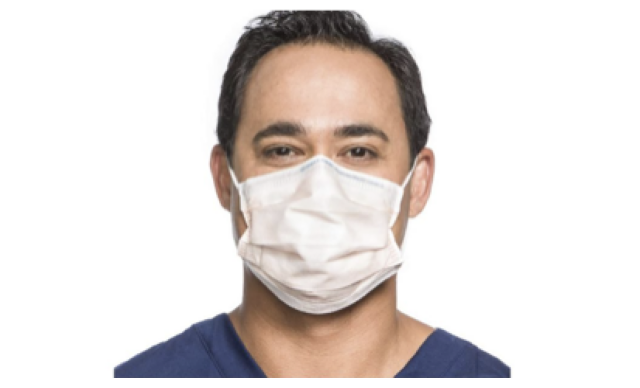

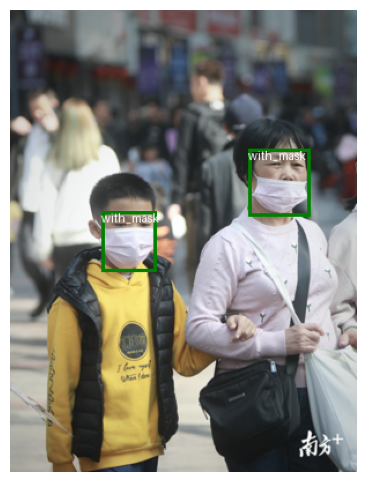

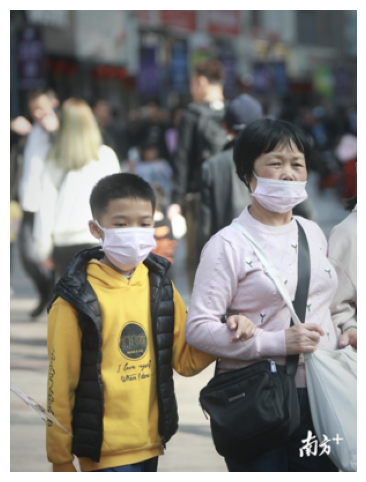

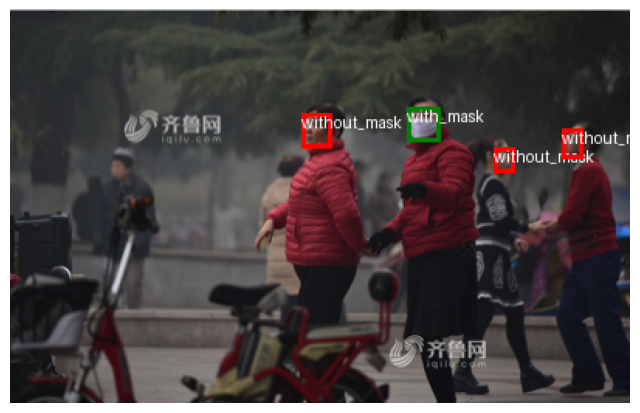

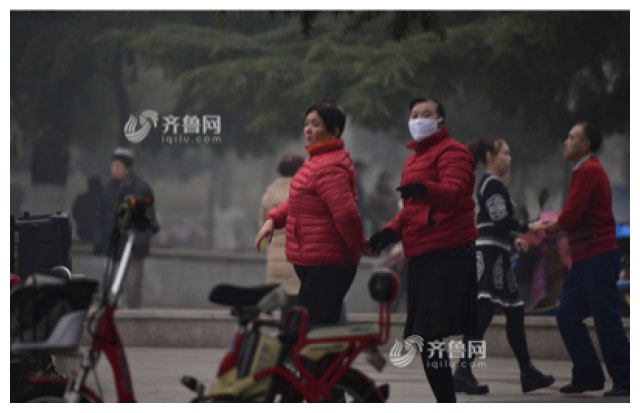

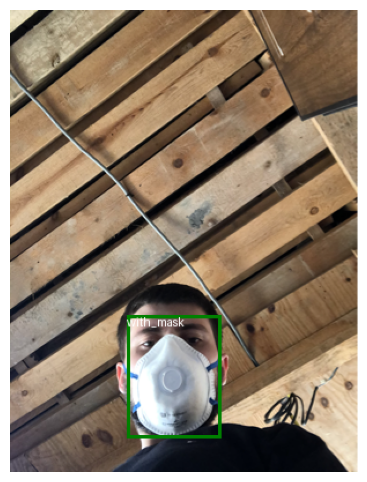

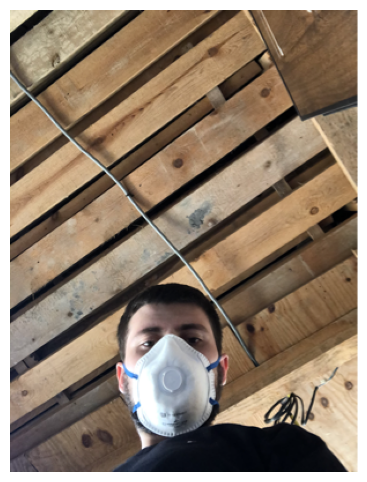

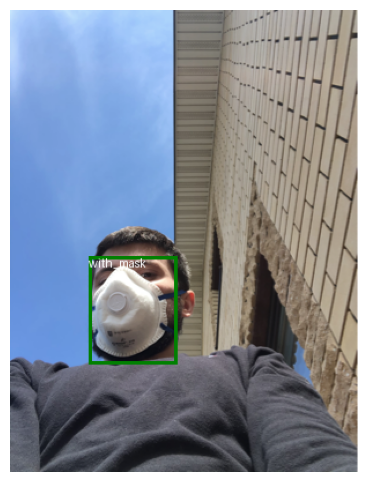

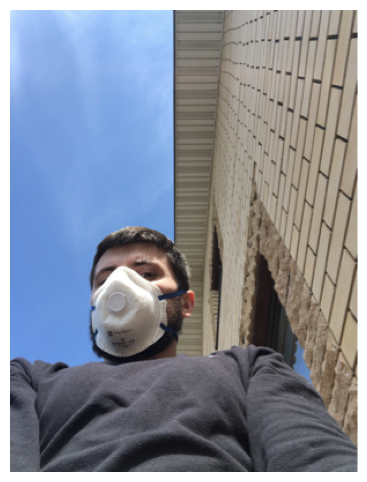

In [1]:
# preview dataset
import os
import random
from xml.etree import ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Define the paths to the annotation and image directories
annotation_path = r"mask_data\annotations"
image_path = r"mask_data\images"


# Define a color map for different object names
name_to_color = {
    "without_mask": "red",       # Example object name to color mapping
    "with_mask": "green",
    "mask_weared_incorrect": "yellow",
}

def load_annotation(annotation_file):
    """Parse the XML annotation file and extract information."""
    tree = ET.parse(annotation_file)
    root = tree.getroot()

    image_info = {}
    objects = []
    
    image_info["filename"] = root.find("filename").text
    size = root.find("size")
    image_info["width"] = int(size.find("width").text)
    image_info["height"] = int(size.find("height").text)
    image_info["depth"] = int(size.find("depth").text)

    # Extract bounding box data for each object
    for obj in root.findall("object"):
        obj_info = {}
        obj_info["name"] = obj.find("name").text
        bndbox = obj.find("bndbox")
        obj_info["xmin"] = int(bndbox.find("xmin").text)
        obj_info["ymin"] = int(bndbox.find("ymin").text)
        obj_info["xmax"] = int(bndbox.find("xmax").text)
        obj_info["ymax"] = int(bndbox.find("ymax").text)
        objects.append(obj_info)

    return image_info, objects

def show_image_with_bboxes(image_info, objects):
    """Display the image with bounding boxes in Jupyter notebook, with color-coded boxes."""
    img_path = os.path.join(image_path, image_info["filename"])
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)

    for obj in objects:
        bbox = (obj["xmin"], obj["ymin"], obj["xmax"], obj["ymax"])
        color = name_to_color.get(obj["name"], "red")  # Default to red if object name is not in the color map
        draw.rectangle(bbox, outline=color, width=3)
        draw.text((obj["xmin"], obj["ymin"]), obj["name"], fill="white")

    # Display image with matplotlib in Jupyter notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

def show_image_without_bboxes(image_info):
    """Display the image without bounding boxes in Jupyter notebook."""
    img_path = os.path.join(image_path, image_info["filename"])
    img = Image.open(img_path)

    # Display image without bounding boxes in matplotlib in Jupyter notebook
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

def review_sample_images(annotation_path, image_path, num_samples=5):
    """Review a sample of images and their annotations."""
    annotation_files = [f for f in os.listdir(annotation_path) if f.endswith(".xml")]
    
    # Randomly select a sample of annotation files
    selected_files = random.sample(annotation_files, num_samples)
    
    for annotation_file in selected_files:
        annotation_file_path = os.path.join(annotation_path, annotation_file)
        image_info, objects = load_annotation(annotation_file_path)
        show_image_with_bboxes(image_info, objects)
        show_image_without_bboxes(image_info)

if __name__ == "__main__":
    # Review a sample of 5 images and their annotations
    review_sample_images(annotation_path, image_path, num_samples=5)



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import os

import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image

import sys
import torch.optim as optim
import xmltodict


In [3]:
# create list of image names and xml names from dataset
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('mask_data/'):
    print(f"\ndirname {dirname}")
    print(f"filenames {filenames}\n")
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)
print(f"image names{img_names}")
print(f"xml names{xml_names}")




dirname mask_data/
filenames []


dirname mask_data/annotations
filenames ['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'makssskskss

In [4]:
# evaluate the classes in the dataset and amount of each class
path_annotations="mask_data/annotations/"
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])
        

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['without_mask', 'with_mask', 'mask_weared_incorrect']) 
 dict_values([717, 3232, 123])


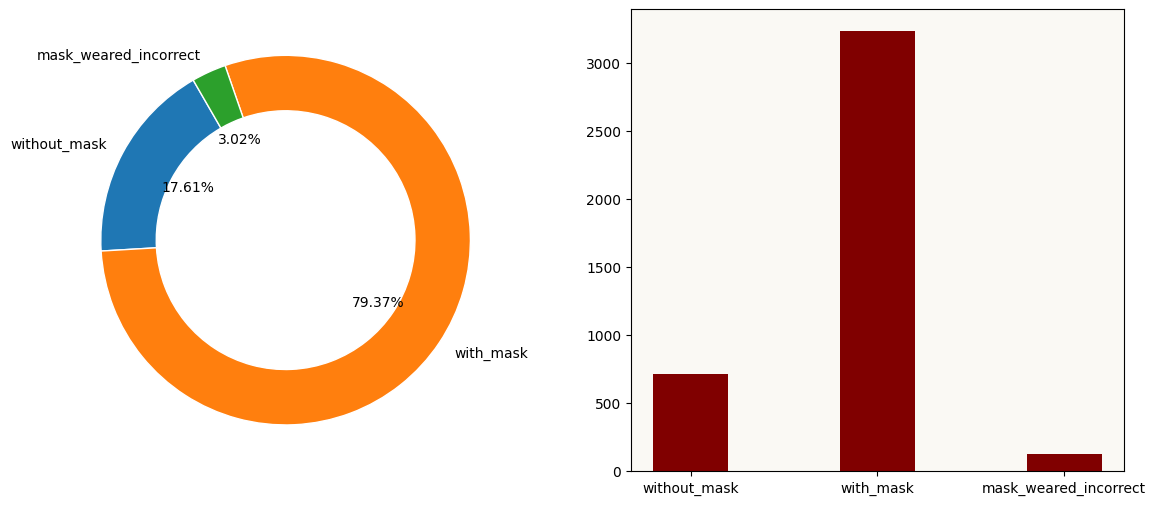

In [5]:
# visualize Dataset Distribution Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(values,wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=Items, radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(Items, list(values),
              color ='maroon',width = 0.4)

plt.show()

# Data Pipeline

In [6]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

In [7]:
# Define the normalization parameters for ResNet
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the transformation pipeline to match ResNet's expected input
my_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects 224x224 input
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize based on ImageNet stats
])


def dataset_creation(image_list, path_annotations, path_image): 
    image_tensor = []
    label_tensor = []

    for i, imageFile in enumerate(image_list):
        base_name = os.path.splitext(imageFile)[0]  # Remove the file extension
        with open(path_annotations + base_name + ".xml") as fd:
            doc = xmltodict.parse(fd.read())
        
        if type(doc["annotation"]["object"]) != list:
            temp = doc["annotation"]["object"]
            x, y, w, h = list(map(int, temp["bndbox"].values()))
            label = options[temp["name"]]
            image = transforms.functional.crop(Image.open(path_image + imageFile).convert("RGB"), y, x, h - y, w - x)
            image_tensor.append(my_transform(image))  # Apply transformations
            label_tensor.append(torch.tensor(label))
        else:
            temp = doc["annotation"]["object"]
            for k in range(len(temp)):
                x, y, w, h = list(map(int, temp[k]["bndbox"].values()))
                label = options[temp[k]["name"]]
                image = transforms.functional.crop(Image.open(path_image + imageFile).convert("RGB"), y, x, h - y, w - x)
                image_tensor.append(my_transform(image))  # Apply transformations
                label_tensor.append(torch.tensor(label))

    # Return the dataset as a tuple of images and labels
    final_dataset = [[k, l] for k, l in zip(image_tensor, label_tensor)]
    return tuple(final_dataset)

In [8]:

# create dataset with call to function
path_image = "mask_data/images/"
path_annotations = "mask_data/annotations/"
mydataset = dataset_creation(img_names, path_annotations, path_image)


In [9]:
# review a random single sample form prepared dataset dimenisions 
image, label = mydataset[22]
print(image.shape)
print(label.shape)
print(image)
print(label)


torch.Size([3, 224, 224])
torch.Size([])
tensor([[[-1.7754, -1.7754, -1.7754,  ..., -0.4054, -0.4054, -0.4054],
         [-1.7754, -1.7754, -1.7754,  ..., -0.4054, -0.4054, -0.4054],
         [-1.7754, -1.7754, -1.7754,  ..., -0.4054, -0.4054, -0.4054],
         ...,
         [ 0.8789,  0.8789,  0.8789,  ...,  0.7933,  0.7933,  0.7933],
         [ 0.8789,  0.8789,  0.8789,  ...,  0.7933,  0.7933,  0.7933],
         [ 0.8789,  0.8789,  0.8789,  ...,  0.7933,  0.7933,  0.7933]],

        [[-1.6856, -1.6856, -1.6856,  ..., -0.3200, -0.3200, -0.3200],
         [-1.6856, -1.6856, -1.6856,  ..., -0.3200, -0.3200, -0.3200],
         [-1.6856, -1.6856, -1.6856,  ..., -0.3200, -0.3200, -0.3200],
         ...,
         [ 1.0805,  1.0805,  1.0805,  ...,  0.2402,  0.2402,  0.2402],
         [ 1.0805,  1.0805,  1.0805,  ...,  0.2402,  0.2402,  0.2402],
         [ 1.0805,  1.0805,  1.0805,  ...,  0.2402,  0.2402,  0.2402]],

        [[-1.4559, -1.4559, -1.4559,  ..., -0.1835, -0.1835, -0.1835],
    

In [10]:
# evaluate the length of the dataset and its partitions
train_size=int(len(mydataset)*0.7)
test_size=len(mydataset)-train_size
print('Length of dataset is', len(mydataset), '\nLength of training set is :',train_size,'\nLength of test set is :', test_size)

Length of dataset is 4072 
Length of training set is : 2850 
Length of test set is : 1222


In [11]:
# spilt the dataset in training and test split
trainset,testset=torch.utils.data.random_split(mydataset,[train_size,test_size])

In [12]:
# Create dataloaders
train_dataloader =DataLoader(dataset=trainset,batch_size=32,shuffle=True,num_workers=4)
test_dataloader =DataLoader(dataset=testset,batch_size=32,shuffle=True,num_workers=4)

In [13]:
# test the dataloader by getting the next iter(one batch)
import sys
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7925336..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2391288].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..1.1410894].


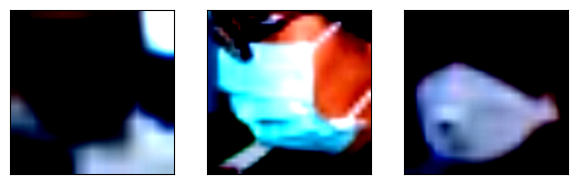

In [14]:
# review the sample from train dataloader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
    
train_features_np=train_features.numpy()

fig=plt.figure(figsize=(25,40))
for idx in np.arange(3):
    ax=fig.add_subplot(2,20//2,idx+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(train_features_np[idx],(1,2,0)))

# Define the model and train

In [15]:
# define the model
from torchvision.models import ResNet34_Weights 
model=models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)

In [16]:
# freeze all layers
for param in model.parameters():
    param.requires_grad=False
    

In [17]:
import torch.nn as nn

n_inputs = model.fc.in_features  # Get the number of input features for the last layer

# Create a new Linear layer with 3 output features
last_layer = nn.Linear(n_inputs, 3)

# This is the correct way to replace the `fc` layer:
model.fc = last_layer

# Now, printing model.fc should show:
print('Reinitialized model with output features as 3:', model.fc)


Reinitialized model with output features as 3: Linear(in_features=512, out_features=3, bias=True)


In [18]:
# Look at model architecture
features_resnet34 = []
for key,value in model._modules.items():
    features_resnet34.append(value)

features_resnet34

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [19]:
# set to use the correct device(gpu or cpu)
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

In [61]:
# Set Hyperparameters
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
model = model.to(device)

In [21]:
# freeze the first 6 layers

# unfreeze the last layer
param.requires_grad=True

ct = 0
for child in model.children():
    print(f"ct: {ct}")
    print(f"child: {child}")
    ct += 1
    if ct < 7:
        for param in child.parameters():
            param.requires_grad = False

ct: 0
child: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
ct: 1
child: BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ct: 2
child: ReLU(inplace=True)
ct: 3
child: MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
ct: 4
child: Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64

In [74]:
# Set the number of epochs for training
print(f"using device: {device}")
n_epochs = 4

for epoch in range(1, n_epochs + 1):
    running_loss = 0.0
    train_losses = []
    correct_train_predictions = 0
    total_train_predictions = 0
    
    # Training loop
    model.train()  # Set model to training mode
    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train_predictions += (predicted == labels).sum().item()
        total_train_predictions += labels.size(0)
        
        if i % 10 == 0:    
            print("Epoch {}, batch {}, training loss {}".format(epoch, i+1, running_loss / 20))
        
        running_loss = 0.0
    
    # Calculate training accuracy for the epoch
    train_accuracy = 100 * correct_train_predictions / total_train_predictions
    print(f"Epoch {epoch}, Training Accuracy: {train_accuracy}%")
    
    # Validation loop
    model.eval()  # Set model to evaluation mode (no gradients)
    correct_predictions = 0
    total_predictions = 0
    val_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy (for classification)
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

    val_accuracy = 100 * correct_predictions / total_predictions
    print(f"Epoch {epoch}, Validation Loss: {val_loss / len(test_dataloader)}, Validation Accuracy: {val_accuracy}%")

print('\nFinished Training')


using device: cuda:0
Epoch 1, batch 1, training loss 0.09484506845474243
Epoch 1, batch 11, training loss 0.0080057792365551
Epoch 1, batch 21, training loss 0.02013607919216156
Epoch 1, batch 31, training loss 0.008256997168064117
Epoch 1, batch 41, training loss 0.010565010458230972
Epoch 1, batch 51, training loss 0.009951596707105636
Epoch 1, batch 61, training loss 0.001586787775158882
Epoch 1, batch 71, training loss 0.0065460242331027985
Epoch 1, batch 81, training loss 0.011429136991500855
Epoch 1, Training Accuracy: 91.08771929824562%
Epoch 1, Validation Loss: 0.26856626130831546, Validation Accuracy: 91.89852700490998%
Epoch 2, batch 1, training loss 0.003100048936903477
Epoch 2, batch 11, training loss 0.015875037014484405
Epoch 2, batch 21, training loss 0.007306749373674393
Epoch 2, batch 31, training loss 0.004982701689004898
Epoch 2, batch 41, training loss 0.02233843058347702
Epoch 2, batch 51, training loss 0.00424642413854599
Epoch 2, batch 61, training loss 0.0049246

In [63]:
# Save the model
torch.save(model.state_dict(), "model_weights.pth")

# Inference Testing

In [75]:
# create list of image names and xml names from dataset
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('test_mask_data/'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)
print(f"image names{img_names}")
print(f"xml names{xml_names}")


image names['360_F_373028852_qrRBZW9u6u1YHlN18qFRTNS4K2PRwGnc.jpg', '47494a59-bc64-42db-bf47-505b49fe8986.webp', '63e7e16e680f5.webp', 'download (1).jpg', 'download (2).jpg', 'download (3).jpg', 'download (4).jpg', 'download (5).jpg', 'download (6).jpg', 'download (7).jpg', 'download.jpg', 'headshot_NI.png', 'Human_faces.jpg', 'i.png', 'images.jpg', 'IMG_7375.webp', 'IMG_7376.webp', 'maksssksksss272.png', 'Payton-BASHOF-Inductees-2023-250x250-1.jpg', 'pexels-olly-3761521.jpg', 'portrait-bearded-man-rustic-style-600nw-196277522.webp', 'shutterstock_1704465010.jpg', 'will-valley-square-crop-300x300.jpg', 'young-asian-man-close-shot-600nw-1562907988.webp']
xml names['360_F_373028852_qrRBZW9u6u1YHlN18qFRTNS4K2PRwGnc.xml', '47494a59-bc64-42db-bf47-505b49fe8986.xml', '63e7e16e680f5.xml', 'download (1).xml', 'download (2).xml', 'download (3).xml', 'download (4).xml', 'download (5).xml', 'download (6).xml', 'download (7).xml', 'download.xml', 'headshot_NI.xml', 'Human_faces.xml', 'i.xml', 'ima

In [76]:
# create dataset with call to function
path_image = "test_mask_data/images/"
path_annotations = "test_mask_data/annotations/"
mydataset = dataset_creation(img_names, path_annotations, path_image)

In [77]:
inference_dataloader = DataLoader(dataset=mydataset,batch_size=32,shuffle=False,num_workers=4)


In [78]:
features, labels = next(iter(inference_dataloader))
print(f"Feature batch shape: {features.size()}")
print(f"Labels batch shape: {labels.size()}")

Feature batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6897851..2.5179958].


Features shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
-----------------------------------------
Image 0: Label = 0


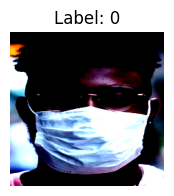

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9131652..2.465708].


-----------------------------------------
Image 1: Label = 1


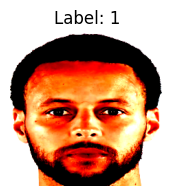

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


-----------------------------------------
Image 2: Label = 1


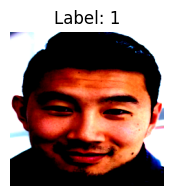

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..2.64].


-----------------------------------------
Image 3: Label = 0


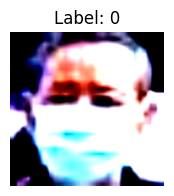

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..2.64].


-----------------------------------------
Image 4: Label = 0


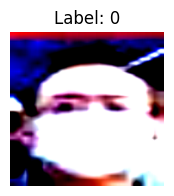

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.5702832].


-----------------------------------------
Image 5: Label = 0


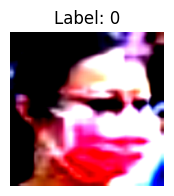

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0474076].


-----------------------------------------
Image 6: Label = 0


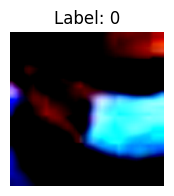

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


-----------------------------------------
Image 7: Label = 0


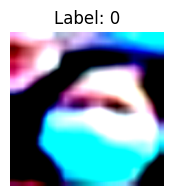

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


-----------------------------------------
Image 8: Label = 0


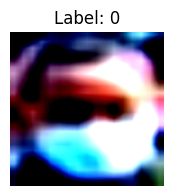

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


-----------------------------------------
Image 9: Label = 0


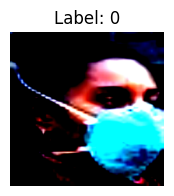

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4831376].


-----------------------------------------
Image 10: Label = 0


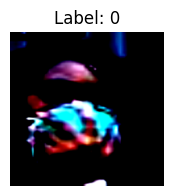

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.64].


-----------------------------------------
Image 11: Label = 2


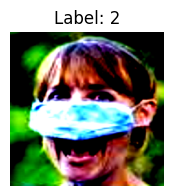

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].


-----------------------------------------
Image 12: Label = 2


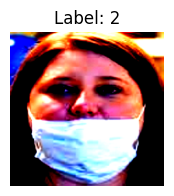

-----------------------------------------
Image 13: Label = 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.535425].


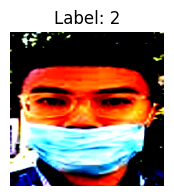

-----------------------------------------
Image 14: Label = 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


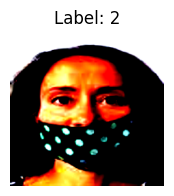

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].


-----------------------------------------
Image 15: Label = 2


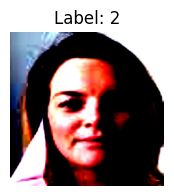

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..1.8905448].


-----------------------------------------
Image 16: Label = 1


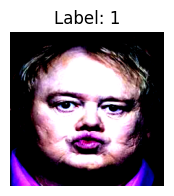

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


-----------------------------------------
Image 17: Label = 0


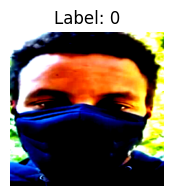

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


-----------------------------------------
Image 18: Label = 0


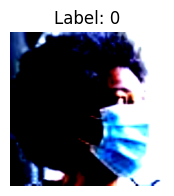

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


-----------------------------------------
Image 19: Label = 1


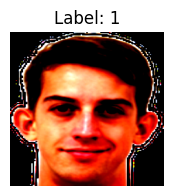

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8256302..2.64].


-----------------------------------------
Image 20: Label = 1


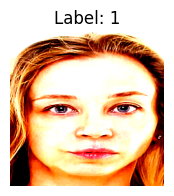

-----------------------------------------
Image 21: Label = 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9831933..2.64].


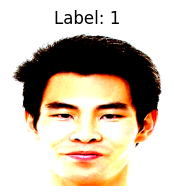

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


-----------------------------------------
Image 22: Label = 1


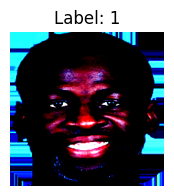

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9656862..2.64].


-----------------------------------------
Image 23: Label = 0


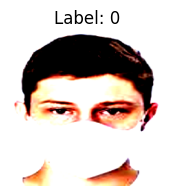

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.2489083].


-----------------------------------------
Image 24: Label = 1


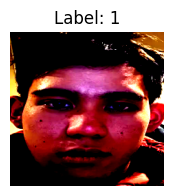

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.5005665].


-----------------------------------------
Image 25: Label = 0


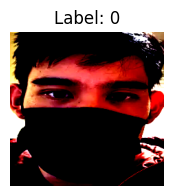

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.5877128].


-----------------------------------------
Image 26: Label = 2


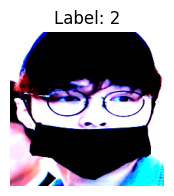

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].


-----------------------------------------
Image 27: Label = 1


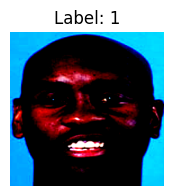

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7754089..2.622571].


-----------------------------------------
Image 28: Label = 1


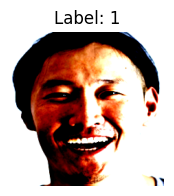

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8267832..2.64].


-----------------------------------------
Image 29: Label = 1


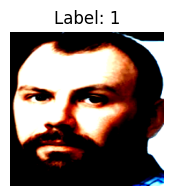

-----------------------------------------
Image 30: Label = 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5980392..2.5702832].


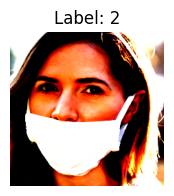

-----------------------------------------
Image 31: Label = 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


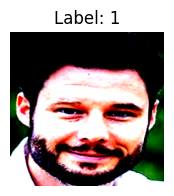

In [79]:
import matplotlib.pyplot as plt

# Assuming features and labels are PyTorch tensors
print("Features shape:", features.shape)  # (23, 3, 224, 224)
print("Labels shape:", labels.shape)      # (23,)

# Iterate through the features and labels
for i, (feature, label) in enumerate(zip(features, labels)):
    print("-----------------------------------------")
    print(f"Image {i}: Label = {label.item()}")
    
    # Convert the feature tensor to a format suitable for display (e.g., HWC format)
    image = feature.permute(1, 2, 0).numpy()  # Change from CHW to HWC for matplotlib

   # Adjust figure size
    plt.figure(figsize=(2, 2))  # Set width and height in inches
    
    # Plot the image
    plt.imshow(image)
    plt.title(f"Label: {label.item()}")
    plt.axis("off")
    plt.show()


In [80]:
# inference on test data
model.eval()

with torch.no_grad():  # Disable gradient calculation during inference
    features = features.to(device)
    labels = labels.to(device)
    output = model(features)

_, predicted_classes = torch.max(output, 1)  # Get the index of the highest score
print(f"prediction: {predicted_classes} ")  # Print the predicted class label (index)
print(f"labels {labels}")

# Compare predictions and labels
correct_predictions = (predicted_classes == labels).sum().item()

# Calculate accuracy
accuracy = correct_predictions / len(labels) * 100

print(f'Accuracy: {accuracy:.2f}%')




prediction: tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1], device='cuda:0') 
labels tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 2, 1, 1, 1, 2, 1], device='cuda:0')
Accuracy: 75.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6897851..2.5179958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9131652..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0007002..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0474076].
Cli

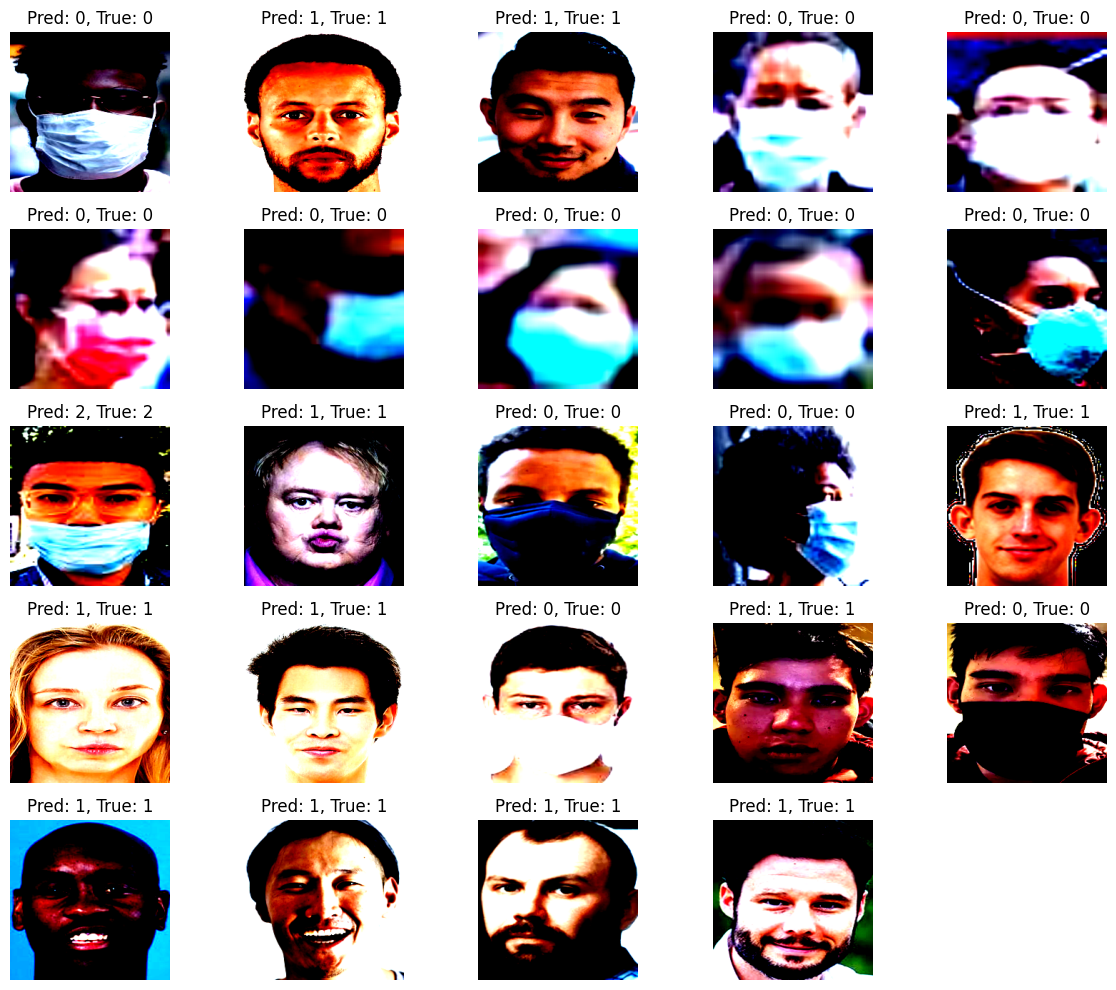

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4831376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5702832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5528543].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.5877128].
Clipp

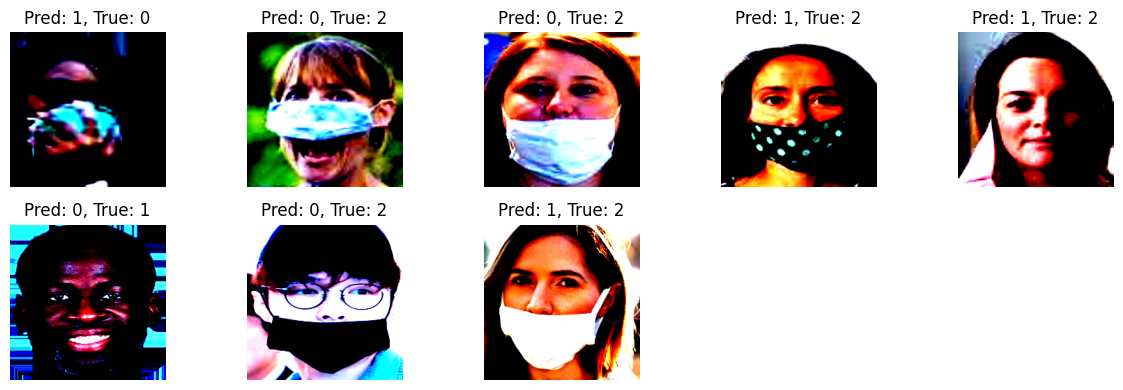

In [81]:
# display the images were guessed correctly vs not guessed correctly
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' is a batch of images and 'labels' is the corresponding true labels
# Convert features from tensor to numpy array for visualization
features = features.cpu().numpy()
labels = labels.cpu().numpy()
predicted_classes = predicted_classes.cpu().numpy()

# Get indices of correctly and incorrectly classified images
correct_indices = np.where(predicted_classes == labels)[0]
incorrect_indices = np.where(predicted_classes != labels)[0]

# Create a function to plot images in a grid
def plot_images(images, titles, ncols=5):
    nrows = len(images) // ncols + (len(images) % ncols > 0)
    plt.figure(figsize=(12, nrows * 2))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(image.transpose(1, 2, 0))  # Convert from CHW to HWC for plotting
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display correctly classified images
correct_images = features[correct_indices]
correct_titles = [f"Pred: {predicted_classes[i]}, True: {labels[i]}" for i in correct_indices]
plot_images(correct_images, correct_titles)

# Display incorrectly classified images
incorrect_images = features[incorrect_indices]
incorrect_titles = [f"Pred: {predicted_classes[i]}, True: {labels[i]}" for i in incorrect_indices]
plot_images(incorrect_images, incorrect_titles)


In [82]:
index = 30

print(f"prediction: {predicted_classes[index]} ")  # Print the predicted class label (index)
print(f"labels {labels[index]}")

prediction: 1 
labels 2


In [83]:
print(features.shape)
print(labels.shape)

imageToShow = features[index]
print(imageToShow.shape)

(32, 3, 224, 224)
(32,)
(3, 224, 224)


In [84]:
# show example image of the sample image to be inferred
import matplotlib.pyplot as plt
import numpy as np


mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]  

imageToShow = imageToShow.cpu()

tensor = imageToShow * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

# Convert tensor to numpy and transpose from [C, H, W] to [H, W, C]
image_np = tensor.numpy().transpose(1, 2, 0)

# Clip the values to the valid range [0, 1] for display
image_np = np.clip(image_np, 0, 1)

# Display the image using matplotlib
plt.imshow(image_np)
plt.axis('off')  # Optional: Turn off the axis
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'